In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


# Let Y=X^3+100+C

In [17]:
np.random.seed(42)
samples=100
X=np.linspace(0,10,100)
rng=np.random.randn(samples)*100
Y=X**3+rng+100


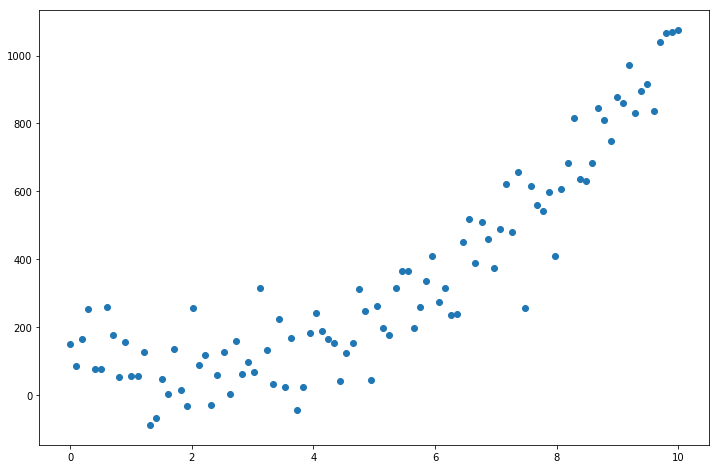

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(X,Y)

# Without noise

there will be only a line of scatter plots start from 100.and Y=X**3+100

# Linear Regressiion

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
lr=LinearRegression()
lr.fit(X.reshape(-1,1),Y)
pred=lr.predict(X.reshape(-1,1))

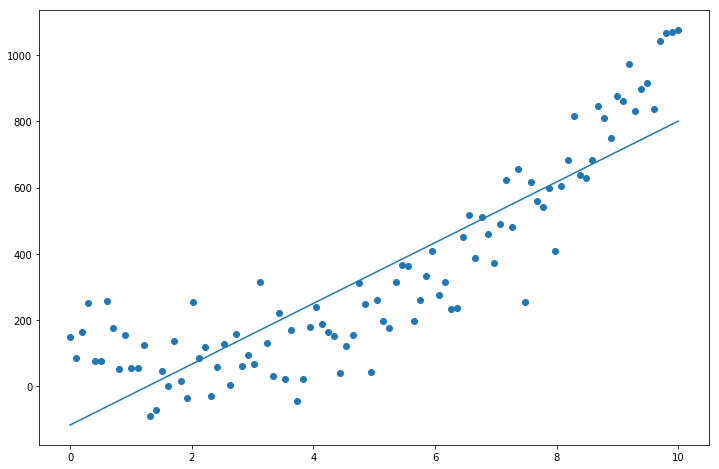

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(X,Y)
plt.plot(X,pred)
plt.show()

In [22]:
print(r2_score(Y,pred))

0.7643394574930141


# Ploynomial

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X.reshape(-1,1))

In [26]:
X_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01010101e-01, 1.02030405e-02],
       [1.00000000e+00, 2.02020202e-01, 4.08121620e-02],
       [1.00000000e+00, 3.03030303e-01, 9.18273646e-02],
       [1.00000000e+00, 4.04040404e-01, 1.63248648e-01],
       [1.00000000e+00, 5.05050505e-01, 2.55076013e-01],
       [1.00000000e+00, 6.06060606e-01, 3.67309458e-01],
       [1.00000000e+00, 7.07070707e-01, 4.99948985e-01],
       [1.00000000e+00, 8.08080808e-01, 6.52994592e-01],
       [1.00000000e+00, 9.09090909e-01, 8.26446281e-01],
       [1.00000000e+00, 1.01010101e+00, 1.02030405e+00],
       [1.00000000e+00, 1.11111111e+00, 1.23456790e+00],
       [1.00000000e+00, 1.21212121e+00, 1.46923783e+00],
       [1.00000000e+00, 1.31313131e+00, 1.72431385e+00],
       [1.00000000e+00, 1.41414141e+00, 1.99979594e+00],
       [1.00000000e+00, 1.51515152e+00, 2.29568411e+00],
       [1.00000000e+00, 1.61616162e+00, 2.61197837e+00],
       [1.00000000e+00, 1.71717

In [30]:
linear_reg=LinearRegression()
linear_reg.fit(X_poly,Y.reshape(-1,1))
pred_2=linear_reg.predict(X_poly)

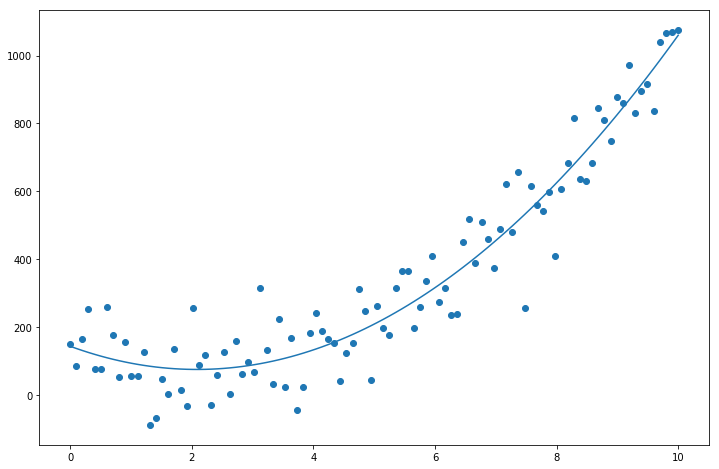

0.9173858308909386


In [34]:
plt.figure(figsize=(12,8))
plt.scatter(X,Y)
plt.plot(X,pred_2)
plt.show()
print(r2_score(Y,pred_2))

# DEALING WITH ACTUAL DATA

In [40]:
df = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)
df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [41]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [43]:
pd.options.display.float_format='{:,.2f}'.format
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [49]:
X_data=df['DIS'].values
Y_data=df['NOX'].values

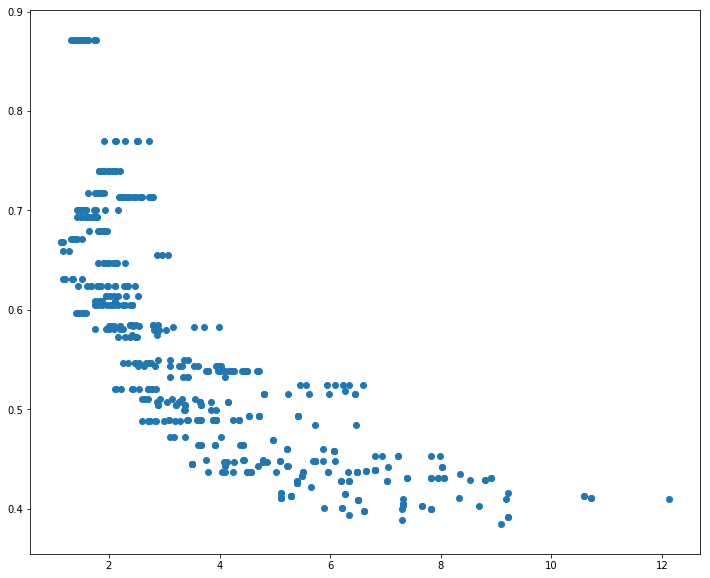

In [51]:
plt.figure(figsize=(12,10))
plt.scatter(X_data,Y_data)
plt.show()

LINEAR REGRESSION

In [52]:
lr=LinearRegression()
lr.fit(X_data.reshape(-1,1),Y_data)
predict=lr.predict(X_data.reshape(-1,1))

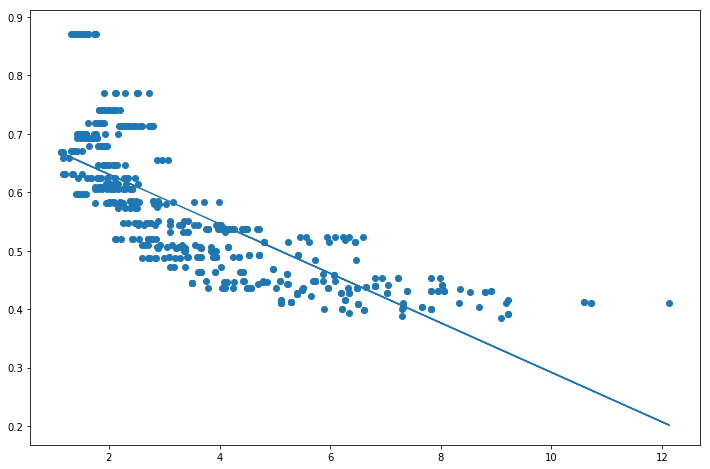

0.5917149670934201


In [55]:
plt.figure(figsize=(12,8))
plt.scatter(X_data,Y_data)
plt.plot(X_data,predict)
plt.show()
print(r2_score(Y_data,predict))

QUADRATIC

In [56]:
poly_=PolynomialFeatures(degree=2)
X_poly=poly_.fit_transform(X_data.reshape(-1,1))
model=LinearRegression()

In [60]:
model.fit(X_poly,Y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
X_fit=np.arange(X_data.min(),X_data.max(),1)[:,np.newaxis]


In [66]:
X_Fit_poly=poly_.fit_transform(X_fit.reshape(-1,1))
pred_1=model.predict(X_Fit_poly)

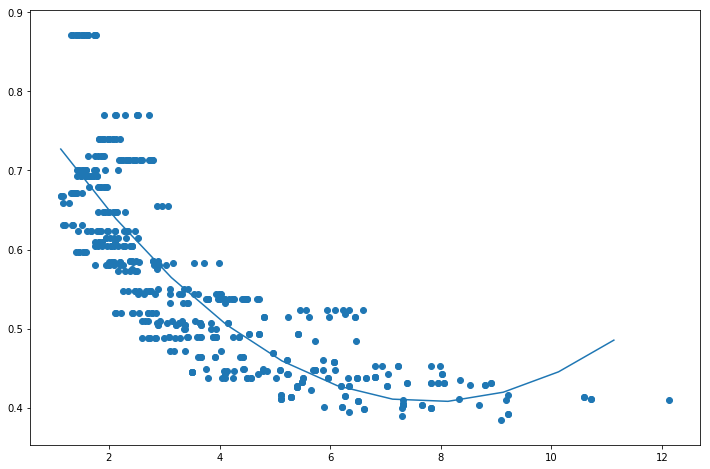

0.6998562064647851


In [68]:
plt.figure(figsize=(12,8))
plt.scatter(X_data,Y_data)
plt.plot(X_fit,pred_1)
plt.show()
print(r2_score(Y_data,model.predict(X_poly)))

IN CUBIC SAME ONLY DEGREE WILL CHANGE TO 3
CUBIC IS BEST THAN QUADRATIC AS AFTER 10 QUD MODEL IS NOT EFFICIENT
